In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.linear_model import LogisticRegression 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


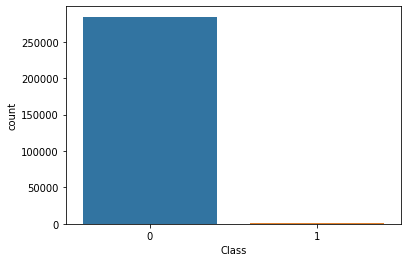

In [ ]:
df['Class'].value_counts()  #imbalanced classes
sns.countplot(df['Class']);

# three cases:
#1. Ignoring ---- model will be biased
#2. Undersampling -- might loss some of useful features
#3. Oversampling ----  might result in overfitting

In [ ]:
# balancing with oversampling
diff = df['Class'].value_counts()[0] - df['Class'].value_counts()[1]
l = diff//df['Class'].value_counts()[1]

In [ ]:
newDf =pd.DataFrame()
new = df[df['Class']==1]
for i in range(l):
  newDf = pd.concat([newDf, new])

df = pd.concat([newDf, df[df['Class']==0] ])
len(df)


567707

# Over sampling by Replication


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


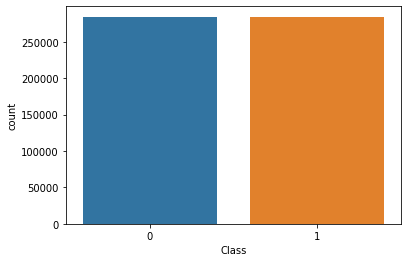

In [ ]:
sns.countplot(df['Class']); # now balanced.

In [ ]:
col_names = df.columns
col_names


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

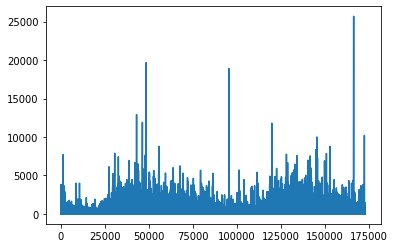

In [ ]:
plt.plot(df['Time'],df['Amount'])

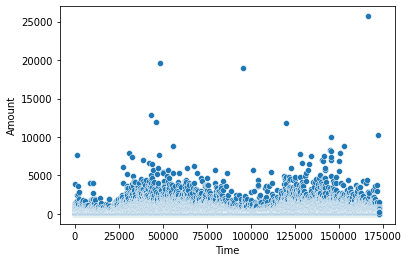

In [ ]:
sns.scatterplot(x = df['Time'],y = df['Amount']);

In [ ]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.243504,-0.219290,0.150392,-0.213599,0.284246,0.109074,0.219083,-0.139122,0.160582,0.215843,-0.314229,0.264711,-0.108850,0.179245,-0.158370,0.239819,0.242090,0.267719,-0.082197,-0.043627,-0.059371,0.127243,0.056263,-0.006637,-0.191925,-0.049520,-0.137886,0.008257,0.009436,-0.146317
V1,0.243504,1.000000,-0.788514,0.878486,-0.614344,0.857656,0.316061,0.879440,-0.081298,0.656419,0.738581,-0.528174,0.592828,-0.054295,0.441607,0.124087,0.634093,0.674044,0.677005,-0.304833,-0.291710,0.015141,-0.036369,-0.044828,-0.069080,-0.078672,0.057206,0.188382,0.173845,-0.038952,-0.432759
V2,-0.219290,-0.788514,1.000000,-0.851641,0.669798,-0.788065,-0.274555,-0.841061,-0.019134,-0.695092,-0.764547,0.614511,-0.665133,0.030445,-0.564009,-0.176694,-0.630754,-0.638490,-0.616502,0.219866,0.302372,0.042182,-0.007126,0.142859,-0.003630,0.109868,-0.004349,-0.157267,0.001391,-0.242606,0.488436
V3,0.150392,0.878486,-0.851641,1.000000,-0.769852,0.851338,0.455204,0.885676,-0.171703,0.764147,0.856216,-0.715219,0.760801,-0.072463,0.654225,0.153023,0.727013,0.736747,0.703055,-0.319058,-0.339721,0.027944,-0.062999,-0.030232,0.013397,-0.086698,-0.011934,0.101431,0.122650,-0.011386,-0.566514
V4,-0.213599,-0.614344,0.669798,-0.769852,1.000000,-0.577226,-0.427714,-0.708569,0.103306,-0.787899,-0.793384,0.795849,-0.835326,0.055161,-0.793438,-0.134415,-0.726225,-0.711190,-0.643402,0.313963,0.284531,-0.020413,0.115651,0.021377,-0.076648,-0.023932,0.142661,-0.009659,-0.066001,0.008504,0.709918
V5,0.284246,0.857656,-0.788065,0.851338,-0.577226,1.000000,0.281327,0.831505,-0.205122,0.657345,0.756552,-0.527781,0.617843,-0.122747,0.431295,0.095641,0.689151,0.743908,0.743120,-0.400659,-0.303936,0.042926,-0.093331,-0.083246,-0.133260,-0.085568,0.060564,0.182926,0.161364,-0.120732,-0.374183
V6,0.109074,0.316061,-0.274555,0.455204,-0.427714,0.281327,1.000000,0.286383,-0.567232,0.365911,0.419737,-0.491172,0.496116,-0.110387,0.528895,-0.042235,0.429602,0.420177,0.354045,-0.221181,-0.110169,0.019672,0.000599,0.312061,-0.023623,-0.130606,-0.038421,-0.160463,-0.033421,0.175496,-0.397881
V7,0.219083,0.879440,-0.841061,0.885676,-0.708569,0.831505,0.286383,1.000000,0.086427,0.761852,0.864887,-0.637376,0.717517,-0.022395,0.541450,0.189152,0.745719,0.767308,0.760384,-0.349703,-0.369836,0.039759,-0.116823,-0.088185,-0.043350,0.050186,0.025646,0.231121,0.142069,0.134264,-0.475902
V8,-0.139122,-0.081298,-0.019134,-0.171703,0.103306,-0.205122,-0.567232,0.086427,1.000000,-0.076615,-0.052917,0.170937,-0.166496,0.272439,-0.186303,0.142204,-0.172940,-0.220014,-0.180221,0.214878,-0.033486,-0.112179,0.033949,-0.411371,0.074003,0.230876,0.046463,0.285430,-0.012403,0.016716,0.058613
V9,0.160582,0.656419,-0.695092,0.764147,-0.787899,0.657345,0.365911,0.761852,-0.076615,1.000000,0.848146,-0.697894,0.765619,-0.039125,0.674653,0.141495,0.726693,0.757540,0.709725,-0.331064,-0.377356,0.158310,-0.239474,-0.053021,0.013555,-0.009124,-0.123856,0.124956,0.132097,0.024225,-0.557288


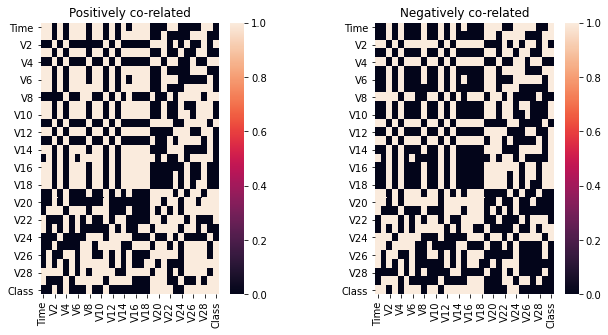

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1);
plt.title('Positively co-related')
sns.heatmap(df.corr()>0)

plt.subplot(1,2,2); 
plt.title('Negatively co-related')
sns.heatmap(df.corr()<0)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

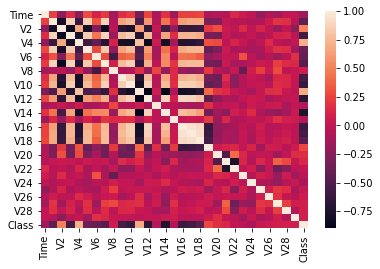

In [ ]:
sns.heatmap(df.corr());
# class is negatively correlated with v1, v3, 

In [ ]:
df.corr()['Class']<=-0.5 # v3 , v9, v10, v12, v14, v16, v17 (-0.5  to -1)
df.corr()['Class']<=-0.25 # v1, v5, v6, v7, v18
df.corr()['Class']<= -0.05 # v13, v24

# 1,2,3,5,6,7,9,10,12,13,14,16,17,18,24 - negatively related


Time       True
V1         True
V2        False
V3         True
V4        False
V5         True
V6         True
V7         True
V8        False
V9         True
V10        True
V11       False
V12        True
V13        True
V14        True
V15       False
V16        True
V17        True
V18        True
V19       False
V20       False
V21       False
V22       False
V23       False
V24        True
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
Name: Class, dtype: bool

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) #tril --lower triangular 
#k=0 for diagnol ele as well ..... k=-n displays n diagnol rows below diagnol 
#where expects bool so astype(np.bool)


In [ ]:
upper
need = [column for column in upper.columns if any(upper[column]>0.3)]
need

['V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V27',
 'Class']

In [ ]:
new_df = df[need] #considering only features with corr > 30%

In [ ]:
Y = new_df['Class']
X = new_df.drop(['Class'], axis=1)


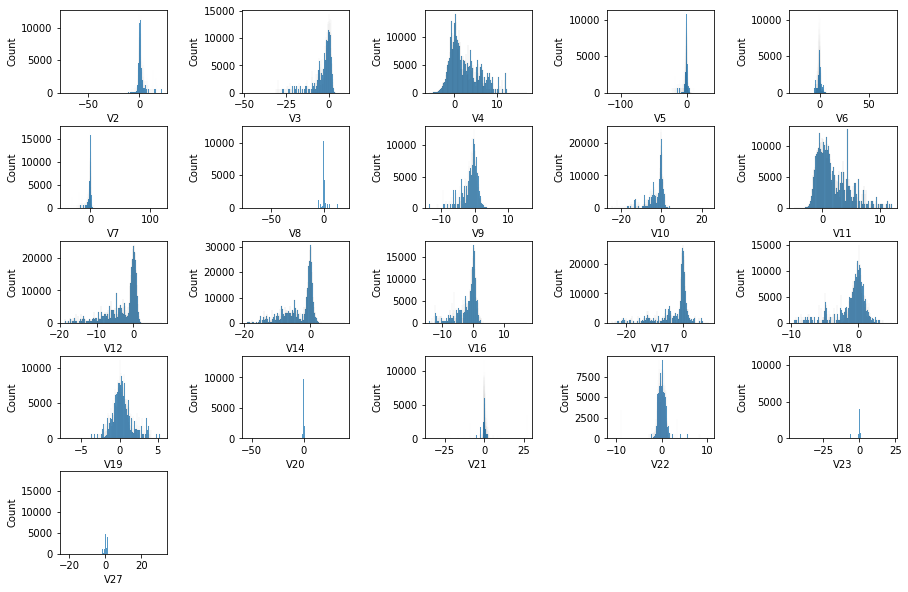

In [ ]:
# sns.boxplot(x=X['V2'])
plt.figure(figsize=(15, 10))

for i in range(0,len(need)-1):
  plt.subplot(5,5,i+1)
  sns.histplot(x= X[X.columns[i]]);

plt.subplots_adjust(wspace=0.7, hspace=0.4)

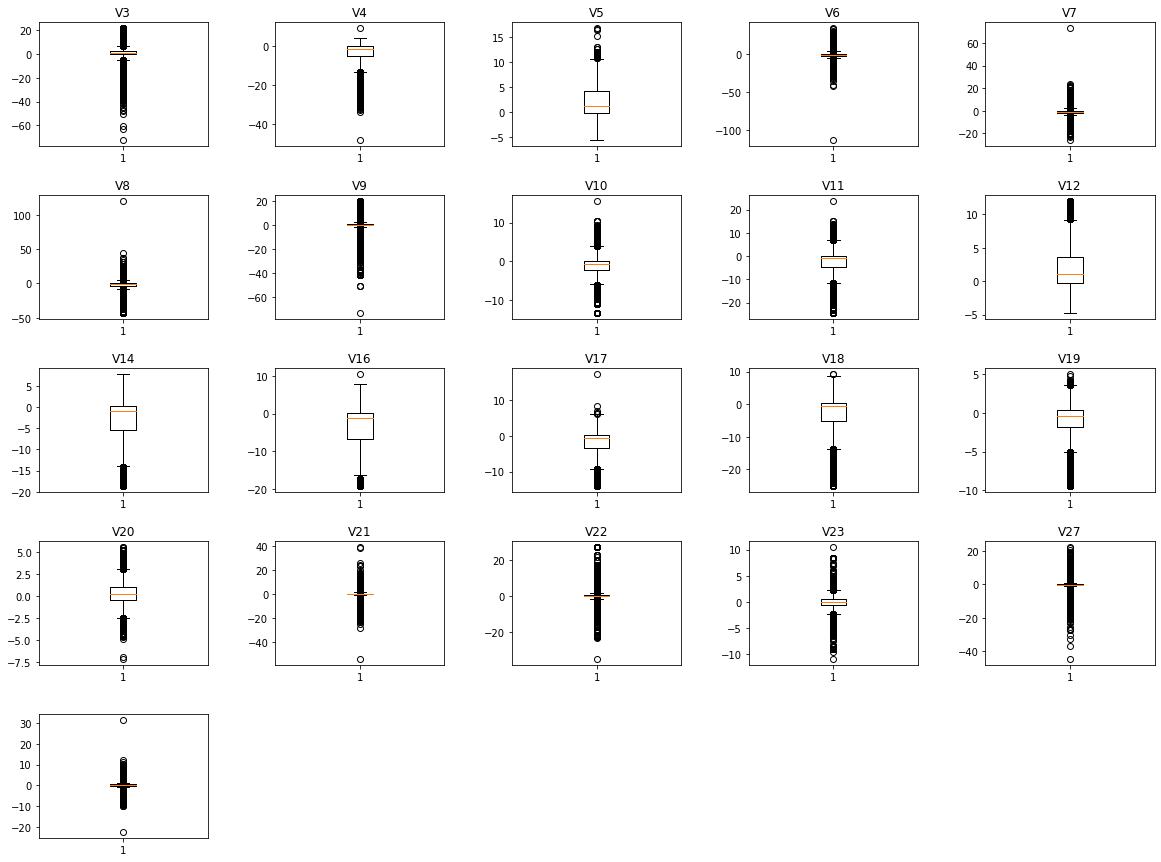

In [ ]:
#Identifying Outliers --boxplot

plt.figure(figsize=(20, 15))

for i in range(0,len(need)-1):
  plt.title(X.columns[i])
  plt.subplot(5,5,i+1)
  plt.boxplot(x= X[X.columns[i]]);

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [ ]:
# outliers for v2
# dropped = pd.DataFrame()
def outliers(threshold = 5, col= new_df['V2']):
  
  q25, q75 = np.percentile(col, 25) , np.percentile(col, 75)
  inter_quartile = q75- q25
  cutoff = inter_quartile*threshold
  outliers = [x for x in col if x<q25 -cutoff or x>q75 +cutoff]
  print("no of outliers are", len(outliers))
  # dropped = new_df.drop((new_df[(col > q75 +cutoff) | (col < q25 -cutoff)].index))
#here we drop based on just one column value which might loss other column values

In [ ]:
#Outlier counts for other as well
for each_name in new_df.columns:
  outliers(5, new_df[each_name])

no of outliers are 2025
no of outliers are 4
no of outliers are 0
no of outliers are 22076
no of outliers are 149
no of outliers are 12160
no of outliers are 41640
no of outliers are 1
no of outliers are 1
no of outliers are 0
no of outliers are 0
no of outliers are 0
no of outliers are 0
no of outliers are 0
no of outliers are 0
no of outliers are 0
no of outliers are 11214
no of outliers are 18459
no of outliers are 4632
no of outliers are 14348
no of outliers are 14164
no of outliers are 0


In [ ]:
#Removing outliers based on z score x-mean/std

nn =new_df[(abs(stats.zscore(new_df)) < 3).all(axis=1)] #calculates mean and std dev for each col.... then it retains all the rows which satisfy that criteria
print("no of outlier rows removed ",len(new_df)- len(nn))

no of outlier rows removed  66416


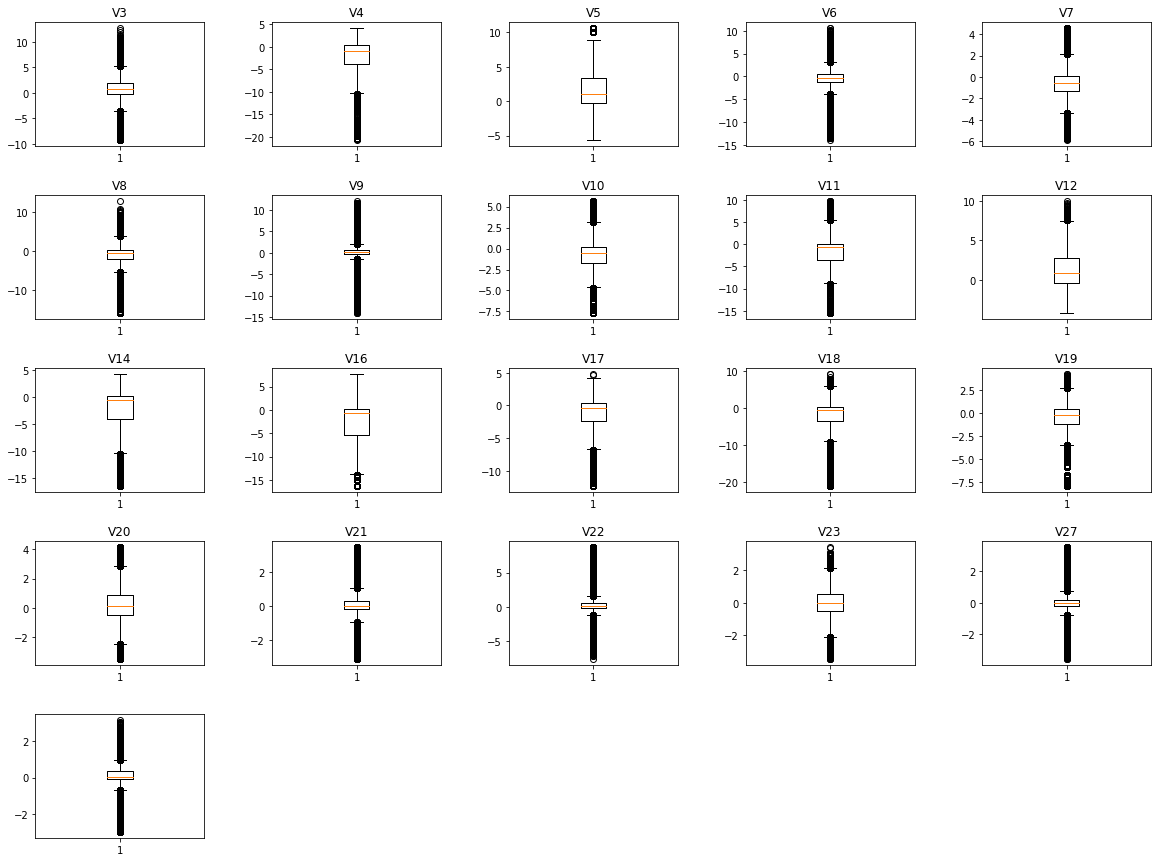

In [ ]:
plt.figure(figsize=(20, 15))

for i in range(0,len(nn.columns)-1):
  plt.title(nn.columns[i])
  plt.subplot(5,5,i+1)
  plt.boxplot(x= nn[nn.columns[i]]);

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [ ]:
index = range(0, len(nn), 1)
nn['index'] = index
nn.set_index('index')

Y = nn[['Class']]
X = nn.drop(['Class'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Xmean = np.mean(X)
Xmin = np.min(X)
Xmax = np.max(X)
Xscaled = (X-Xmin)/(Xmax-Xmin) #normalizing

In [ ]:
Xscaled.shape

(501291, 22)

In [ ]:
# Remove Highly correlated columns
corr_matrix = Xscaled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) #tril --lower triangular 

highly_correlated = [column for column in upper.columns if any(upper[column]>0.7)]
highly_correlated

['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

In [ ]:
s = set(Xscaled.columns)- set(highly_correlated)
log_df = Xscaled[list(s)]
# log_df
xtrain, xtest, ytrain, ytest = train_test_split(log_df, Y, test_size = 0.25, random_state = 0) 

In [ ]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(xtest) 

In [ ]:

cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm)
print("\nAccuracy is ",(cm[0][0] +cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1]))  #TRUE/ALL
print("\nPrecision is", cm[0][0]/(cm[0][0]+cm[0][1]))  # Precision = TP/ (TP + FP)
print("\nRecall is ",cm[0][0]/(cm[0][0]+cm[1][0]) ) #RECALL = TP/(TP + FN)


Confusion Matrix : 
 [[69855   127]
 [  243 55098]]

Accuracy is  0.9970476289268531

Precision is 0.9981852476351062

Recall is  0.9965334246340837


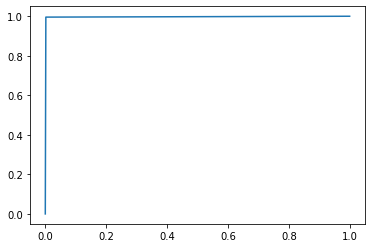

In [ ]:
### ROC
fpr,tpr,threshold = roc_curve(ytest, y_pred, pos_label =1 )
plt.plot(fpr,tpr)

In [ ]:
#testing with original dataset
Ydata = df['Class']
df['index']=[x for x in range(len(df))]
Xdata = df.drop(['Class'], axis=1)
XData = Xdata[list(s)]

test_pred = classifier.predict(XData)

In [ ]:
cm = confusion_matrix(Ydata, test_pred) 
  
print ("Confusion Matrix : \n", cm)
print("\nAccuracy is ",(cm[0][0] +cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])) 
print("\nPrecision is", cm[0][0]/(cm[0][0]+cm[0][1]))
print("\nRecall is ",cm[0][0]/(cm[0][0]+cm[1][0]) )

Confusion Matrix : 
 [[284315      0]
 [283391      1]]

Accuracy is  0.5008146808124614

Precision is 1.0

Recall is  0.5008138015099365


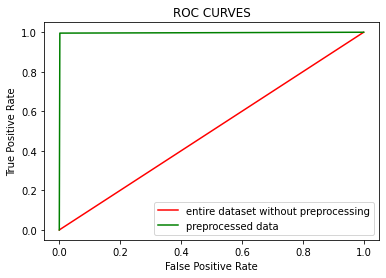

In [ ]:
### ROC
plt.title("ROC CURVES")
fpr1,tpr1,threshold1 = roc_curve(Ydata, test_pred, pos_label =1 )
plt.plot(fpr1,tpr1, color='red', label = 'entire dataset without preprocessing')
plt.plot(fpr, tpr, color='green', label = 'preprocessed data')
plt.xlabel("False Positive Rate")  #FPR = FP/N
plt.ylabel("True Positive Rate")  #TPR = TP/P #PRECISION
plt.legend(loc='lower right')

# With SMOTE



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


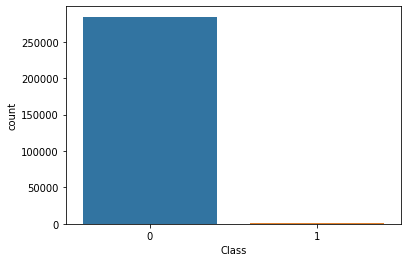

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
sns.countplot(df2['Class'])

In [ ]:
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.8)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(df2[df2.columns[:-1]], df2['Class'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


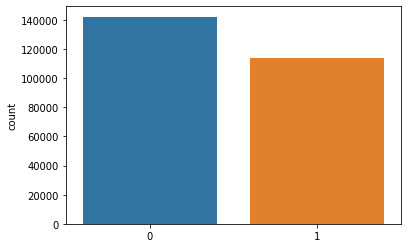

In [ ]:
sns.countplot(x=y)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [ ]:
classifier2 = LogisticRegression(random_state = 0) 
classifier2.fit(Xtrain, Ytrain) 
pred = classifier2.predict(Xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cm = confusion_matrix(Ytest, pred) 
  
print ("Confusion Matrix : \n", cm)
print("\nAccuracy is ",(cm[0][0] +cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])) 
print("\nPrecision is", cm[0][0]/(cm[0][0]+cm[0][1]))
print("\nRecall is ",cm[0][0]/(cm[0][0]+cm[1][0]) )

Confusion Matrix : 
 [[34893   624]
 [ 1147 27307]]

Accuracy is  0.9723155804974128

Precision is 0.9824309485598446

Recall is  0.9681742508324085


Estimating for entire original dataset

In [ ]:
p=classifier2.predict(df2[df2.columns[:-1]])

In [ ]:
cm = confusion_matrix(df2['Class'], p) 
  
print ("Confusion Matrix : \n", cm)
print("\nAccuracy is ",(cm[0][0] +cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])) 
print("\nPrecision is", cm[0][0]/(cm[0][0]+cm[0][1]))
print("\nRecall is ",cm[0][0]/(cm[0][0]+cm[1][0]) )

Confusion Matrix : 
 [[279269   5046]
 [    54    438]]

Accuracy is  0.9820931367557679

Precision is 0.9822520795596433

Recall is  0.9998066754259406


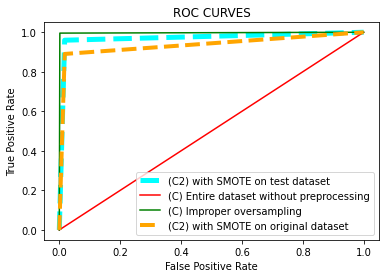

In [ ]:
### ROC
plt.title("ROC CURVES")
fpr2,tpr2,threshold2 = roc_curve(df2['Class'], p, pos_label =1 )
fpr3, tpr3, threshold3 = roc_curve(Ytest, pred, pos_label = 1)
plt.plot(fpr3, tpr3, color='cyan', linestyle='dashed', linewidth= 5, label = '(C2) with SMOTE on test dataset')
plt.plot(fpr1,tpr1, color='red', label = '(C) Entire dataset without preprocessing')
plt.plot(fpr, tpr, color='green', label = '(C) Improper oversampling')
plt.plot(fpr2, tpr2,color ='orange',linewidth=4,linestyle='dashed',label='(C2) with SMOTE on original dataset')

plt.xlabel("False Positive Rate")  #FPR = FP/N
plt.ylabel("True Positive Rate")  #TPR = TP/P #PRECISION
plt.legend(loc='lower right');

Dropping highly correlated columns and outliers

In [ ]:
data = pd.DataFrame( data = X)
data.columns = df.columns[:-2]
data = data.drop(highly_correlated,axis=1)
data['Class'] = y
data0 = data[data['Class']==0]
data1 = data[data['Class']==1]
out0 = data0[(abs(stats.zscore(data0[data.columns[:-1]]))<3).all(axis=1)]
out1 = data1[(abs(stats.zscore(data1[data.columns[:-1]]))<3).all(axis=1)]
print(len(out1) + len(out0))
no_outliers_df = data[(abs(stats.zscore(data)) < 3).all(axis=1)] 
print(len(no_outliers_df))


class_no_noise = pd.concat([out1, out0])


228163
224954


In [ ]:
stats.zscore(data0)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[-0.56119896,  0.74022066, -0.57468395, ...,  0.01247505,
        -0.13186398,         nan],
       [-0.89221509, -0.43017862,  0.50711698, ..., -0.36831931,
        -0.3258277 ,         nan],
       [-0.2155333 ,  0.67719577, -0.45356052, ...,  0.02282799,
        -0.14645582,         nan],
       ...,
       [ 0.7210459 ,  0.96041563, -0.38929862, ..., -0.04940702,
        -0.10442137,         nan],
       [ 1.48912389,  1.08332483, -0.11767033, ..., -0.24290503,
        -0.35281432,         nan],
       [-0.38222176, -0.41624672,  0.42713726, ...,  0.13357737,
        -0.33909302,         nan]])

In [ ]:
Xtrai, Xtes, Ytrai, Ytes = train_test_split(class_no_noise[class_no_noise.columns[:-1]], class_no_noise[class_no_noise.columns[-1]], test_size = 0.25, random_state = 0)
classifier4 = LogisticRegression(random_state = 0) 
classifier4.fit(Xtrai, Ytrai) 
predi = classifier4.predict(Xtes)
cc = confusion_matrix(Ytes, predi)
print(cc)
print("\nAccuracy is ",(cc[0][0] +cc[1][1])/(cc[0][1]+cc[1][0]+cc[0][0]+cc[1][1])) 
print("\nPrecision is", cc[0][0]/(cc[0][0]+cc[0][1]))
print("\nRecall is ",cc[0][0]/(cc[0][0]+cc[1][0]) )

fpr6, tpr6, threshold6 = roc_curve(Ytes, predi, pos_label = 1)


[[28266  3820]
 [ 3339 21616]]

Accuracy is  0.8744937851720692

Precision is 0.8809449604188743

Recall is  0.8943521594684385


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(no_outliers_df[no_outliers_df.columns[:-1]], no_outliers_df[no_outliers_df.columns[-1]], test_size = 0.25, random_state = 0)
classifier3 = LogisticRegression(random_state = 0) 
classifier3.fit(Xtrain, Ytrain) 
pred = classifier3.predict(Xtest)

In [ ]:
CM = confusion_matrix(Ytest,pred)
print(CM)
print("\nAccuracy is ",(CM[0][0] +CM[1][1])/(CM[0][1]+CM[1][0]+CM[0][0]+CM[1][1])) 
print("\nPrecision is", CM[0][0]/(CM[0][0]+CM[0][1]))
print("\nRecall is ",CM[0][0]/(CM[0][0]+CM[1][0]) )

[[27914  5431]
 [ 5123 17771]]

Accuracy is  0.8123366347196785

Precision is 0.8371270055480582

Recall is  0.8449314405060993


In [ ]:
train_pred = classifier3.predict(Xtrain)
CM = confusion_matrix(Ytrain,train_pred)
print(CM)
print("\nAccuracy is ",(CM[0][0] +CM[1][1])/(CM[0][1]+CM[1][0]+CM[0][0]+CM[1][1])) 
print("\nPrecision is", CM[0][0]/(CM[0][0]+CM[0][1]))
print("\nRecall is ",CM[0][0]/(CM[0][0]+CM[1][0]) )

[[84247 16151]
 [15295 53022]]

Accuracy is  0.8136146756364283

Precision is 0.8391302615589952

Recall is  0.846346265897812


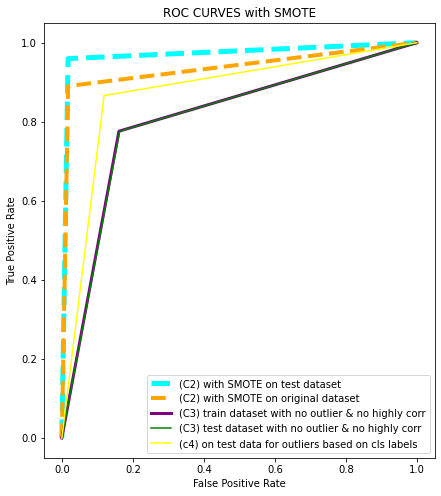

In [ ]:
plt.figure(figsize=(7,8))
plt.title("ROC CURVES with SMOTE")

fpr4, tpr4, threshold4 = roc_curve(Ytrain, train_pred, pos_label = 1)
fpr5, tpr5, threshold5 = roc_curve(Ytest, pred, pos_label = 1)
plt.plot(fpr3, tpr3, color='cyan', linestyle='dashed', linewidth= 5, label = '(C2) with SMOTE on test dataset')
# plt.plot(fpr1,tpr1, color='red', label = '(C) Entire dataset without preprocessing')
# plt.plot(fpr, tpr, color='green', label = '(C) Improper oversampling')
plt.plot(fpr2, tpr2,color ='orange',linewidth=4,linestyle='dashed',label='(C2) with SMOTE on original dataset')
plt.plot(fpr4, tpr4,color='purple',linewidth=3, label="(C3) train dataset with no outlier & no highly corr" )
plt.plot(fpr5, tpr5, color='green',label="(C3) test dataset with no outlier & no highly corr")
plt.plot(fpr6, tpr6, color= 'yellow', label='(c4) on test data for outliers based on cls labels' )

plt.xlabel("False Positive Rate")  #FPR = FP/N
plt.ylabel("True Positive Rate")  #TPR = TP/P #PRECISION
plt.legend(loc='lower right')